In [22]:
import pandas as pd
d = pd.read_csv(r'C:\Users\HP\Downloads\Telegram Desktop\student-por.csv', sep=';')
len(d)


649

In [23]:
d.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [24]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0,axis=1)
d = d.drop(['G1','G2','G3'],axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [25]:
#use one-hot encoding on categorical columns
d = pd.get_dummies(d,columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [26]:
#shuffle rows
d=d.sample(frac=1)
#split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'],axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'],axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'],axis=1)
d_pass = d['pass']

#number of passing students in whole dataset:
import numpy as np 
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))


Passing: 328 out of 649 (50.54%)


In [27]:
from sklearn import tree 
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t=t.fit(d_train_att,d_train_pass)

In [28]:
#save tree
tree.export_graphviz(t, out_file="student_performance.dot" , label = "all", impurity=False, proportion=True, feature_names=list(d_train_att), class_names=["fail","pass"],filled=True, rounded=True)

In [29]:
t.score(d_test_att, d_test_pass)

0.7046979865771812

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t,d_att, d_pass, cv=5)
#show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.04)


In [31]:
for max_depth in range (1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.03)
Max depth: 2, Accuracy: 0.69 (+/- 0.02)
Max depth: 3, Accuracy: 0.69 (+/- 0.06)
Max depth: 4, Accuracy: 0.69 (+/- 0.03)
Max depth: 5, Accuracy: 0.68 (+/- 0.05)
Max depth: 6, Accuracy: 0.66 (+/- 0.05)
Max depth: 7, Accuracy: 0.67 (+/- 0.02)
Max depth: 8, Accuracy: 0.65 (+/- 0.02)
Max depth: 9, Accuracy: 0.64 (+/- 0.01)
Max depth: 10, Accuracy: 0.65 (+/- 0.03)
Max depth: 11, Accuracy: 0.64 (+/- 0.05)
Max depth: 12, Accuracy: 0.63 (+/- 0.07)
Max depth: 13, Accuracy: 0.63 (+/- 0.06)
Max depth: 14, Accuracy: 0.64 (+/- 0.06)
Max depth: 15, Accuracy: 0.63 (+/- 0.04)
Max depth: 16, Accuracy: 0.64 (+/- 0.06)
Max depth: 17, Accuracy: 0.63 (+/- 0.03)
Max depth: 18, Accuracy: 0.64 (+/- 0.05)
Max depth: 19, Accuracy: 0.64 (+/- 0.04)


In [32]:
depth_acc = np.empty((19,3),float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1

depth_acc

array([[1.00000000e+00, 6.37901014e-01, 2.58408379e-02],
       [2.00000000e+00, 6.85652952e-01, 1.90498542e-02],
       [3.00000000e+00, 6.88694097e-01, 5.69466281e-02],
       [4.00000000e+00, 6.87191413e-01, 1.71266504e-02],
       [5.00000000e+00, 6.87155635e-01, 4.97887216e-02],
       [6.00000000e+00, 6.56410256e-01, 4.36349690e-02],
       [7.00000000e+00, 6.70220632e-01, 4.30680734e-02],
       [8.00000000e+00, 6.44031008e-01, 3.70782365e-02],
       [9.00000000e+00, 6.36338700e-01, 4.87878478e-02],
       [1.00000000e+01, 6.51747168e-01, 6.95608621e-02],
       [1.10000000e+01, 6.30196780e-01, 6.53115474e-02],
       [1.20000000e+01, 6.39439475e-01, 4.81869790e-02],
       [1.30000000e+01, 6.39379845e-01, 6.42193874e-02],
       [1.40000000e+01, 6.51723315e-01, 4.23019562e-02],
       [1.50000000e+01, 6.37865236e-01, 6.24720592e-02],
       [1.60000000e+01, 6.47131783e-01, 7.40320142e-02],
       [1.70000000e+01, 6.34788312e-01, 5.64578448e-02],
       [1.80000000e+01, 6.39403

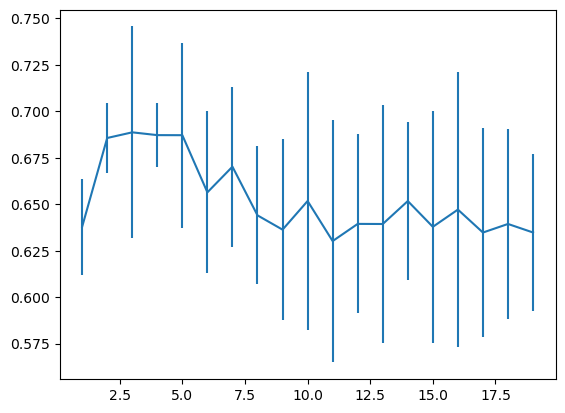

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()
